In [1]:
using CausalForest
using Plots
using StatsBase

In [2]:
indices,X,T,Y = load_data("causal");
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].>0.5;

# Subsampling not honest

In [3]:
cf1 = build_forest(false, false, false, Y, T, X, false, -1, 100);
pred1 = apply_forest(cf1, Xtest);

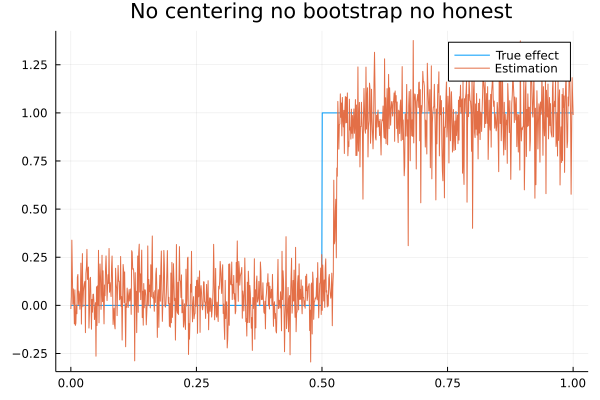

In [4]:
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "No centering no bootstrap no honest", fmt = :png)

In [5]:
cf2 = build_forest(true, false, false, Y, T, X, false, -1, 100);
pred2 = apply_forest(cf2, Xtest);

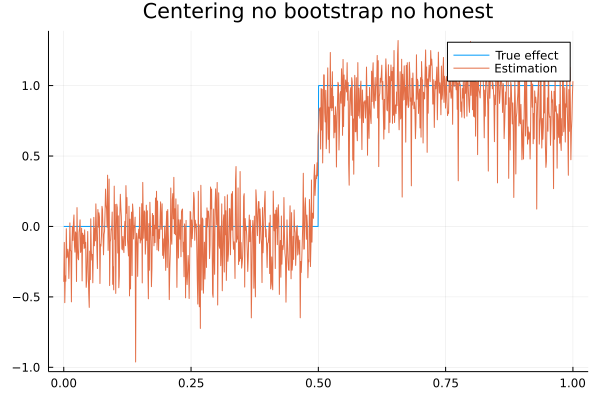

In [6]:
plot(Xtest[:, 1], [true_effect, pred2], label=["True effect" "Estimation"], title = "Centering no bootstrap no honest", fmt = :png)

In [7]:
rmsd(float(true_effect), pred1)

0.2026510364638948

In [8]:
rmsd(float(true_effect), pred2)

0.23463931835152202

# Subsampling honest

In [9]:
cf3 = build_forest(false, false, true, Y, T, X, false, -1, 100);
pred3 = apply_forest(cf3, Xtest);

In [10]:
cf4 = build_forest(true, false, true, Y, T, X, false, -1, 100);
pred4 = apply_forest(cf4, Xtest);

In [11]:
rmsd(float(true_effect), pred3)

0.16857970244495732

In [12]:
rmsd(float(true_effect), pred4)

0.13106007707610173

# Bootstrap not honest

In [13]:
cf5 = build_forest(false, true, false, Y, T, X, false, -1, 100);
pred5 = apply_forest(cf5, Xtest);

In [14]:
cf6 = build_forest(true, true, false, Y, T, X, false, -1, 100);
pred6 = apply_forest(cf6, Xtest);

In [15]:
rmsd(float(true_effect), pred5)

0.2074075810527488

In [16]:
rmsd(float(true_effect), pred6)

0.24638501796263687

# Bootstrap honest

In [17]:
cf7 = build_forest(false, true, true, Y, T, X, false, -1, 100);
pred7 = apply_forest(cf7, Xtest);

In [18]:
cf8 = build_forest(true, true, true, Y, T, X, false, -1, 100);
pred8 = apply_forest(cf8, Xtest);

In [19]:
rmsd(float(true_effect), pred7)

0.17499971518467344

In [20]:
rmsd(float(true_effect), pred8)

0.12398153985628163

# 500 arbres

# Subsampling not honest

In [21]:
cf1 = build_forest(false, false, false, Y, T, X, false, -1, 500);
pred1 = apply_forest(cf1, Xtest);

In [22]:
cf2 = build_forest(true, false, false, Y, T, X, false, -1, 500);
pred2 = apply_forest(cf2, Xtest);

In [23]:
rmsd(float(true_effect), pred1)

0.1931508538343687

In [24]:
rmsd(float(true_effect), pred2)

0.2247102772458592

# Subsampling honest

In [25]:
cf3 = build_forest(false, false, true, Y, T, X, false, -1, 500);
pred3 = apply_forest(cf3, Xtest);

In [26]:
cf4 = build_forest(true, false, true, Y, T, X, false, -1, 500);
pred4 = apply_forest(cf4, Xtest);

In [27]:
rmsd(float(true_effect), pred3)

0.15602708300177567

In [28]:
rmsd(float(true_effect), pred4)

0.1218474748021328

# Bootstrap not honest

In [29]:
cf5 = build_forest(false, true, false, Y, T, X, false, -1, 500);
pred5 = apply_forest(cf5, Xtest);

In [30]:
cf6 = build_forest(true, true, false, Y, T, X, false, -1, 500);
pred6 = apply_forest(cf6, Xtest);

In [31]:
rmsd(float(true_effect), pred5)

0.19637650223865813

In [32]:
rmsd(float(true_effect), pred6)

0.22304932648816306

# Bootstrap honest

In [33]:
cf7 = build_forest(false, true, true, Y, T, X, false, -1, 500);
pred7 = apply_forest(cf7, Xtest);

In [34]:
cf8 = build_forest(true, true, true, Y, T, X, false, -1, 500);
pred8 = apply_forest(cf8, Xtest);

In [35]:
rmsd(float(true_effect), pred7)

0.15248554845787576

In [36]:
rmsd(float(true_effect), pred8)

0.11791064741299977

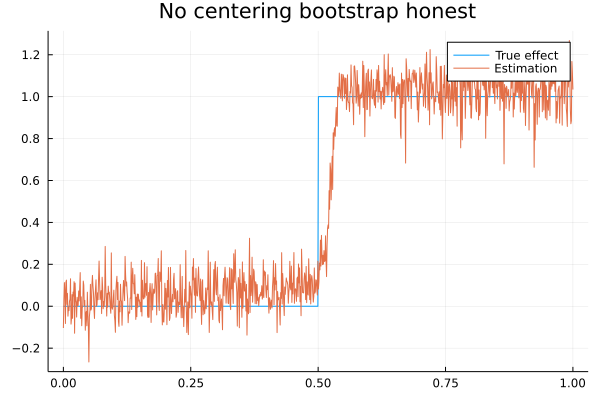

In [37]:
plot(Xtest[:, 1], [true_effect, pred7], label=["True effect" "Estimation"], title = "No centering bootstrap honest", fmt = :png)

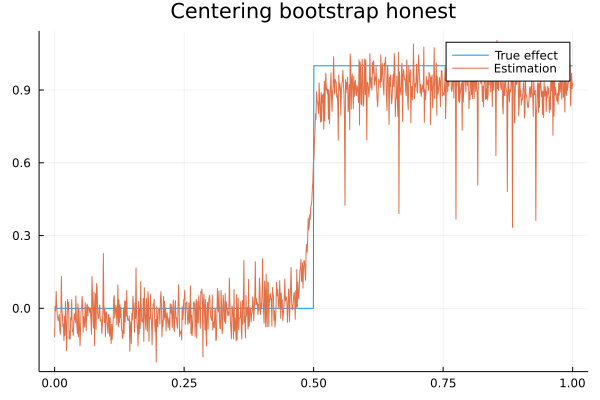

In [38]:
plot(Xtest[:, 1], [true_effect, pred8], label=["True effect" "Estimation"], title = "Centering bootstrap honest", fmt = :png)